<a href="https://colab.research.google.com/github/Srividhya073/capstone-3/blob/main/Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_store = pd.read_csv("/content/stores_data_set.csv")
df_feature = pd.read_csv("/content/Features_data_set.csv",parse_dates=["Date"])
df_sales = pd.read_csv("/content/sales_data_set.csv",parse_dates=["Date"])

In [ ]:
print(df_store.info())
print(df_store.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [ ]:
print(df_feature.info())
print(df_feature.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
None
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-05-02        

In [ ]:
print(df_sales.info())
print(df_sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68267 entries, 0 to 68266
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         68267 non-null  int64         
 1   Dept          68267 non-null  int64         
 2   Date          68267 non-null  datetime64[ns]
 3   Weekly_Sales  68267 non-null  float64       
 4   IsHoliday     68266 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.6+ MB
None
   Store  Dept       Date  Weekly_Sales IsHoliday
0      1     1 2010-05-02      24924.50     False
1      1     1 2010-12-02      46039.49      True
2      1     1 2010-02-19      41595.55     False
3      1     1 2010-02-26      19403.54     False
4      1     1 2010-05-03      21827.90     False


In [ ]:
data_date = df_feature.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
data_date = data_date.sort_index()
temp_date_data = data_date[:'2012-12-10']

data_sales_date = df_sales.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date, temp_date_data, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )

In [ ]:
print(data.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count    143.000000   143.000000  143.000000  143.000000    143.000000
mean       7.888112    60.663782    3.358607  171.578394      7.999151
std        0.986564    15.172792    0.429401    3.100148      0.483853
min        7.000000    30.480889    2.672067  167.546485      6.953711
25%        7.000000    47.720222    2.885367  168.408144      7.508333
50%        8.000000    61.051111    3.488644  171.386189      8.150133
75%        8.000000    74.697333    3.726133  174.724576      8.428578
max       14.000000    82.176444    3.997778  176.652613      8.619311


<Axes: title={'center': 'Unemployment'}, xlabel='Date'>

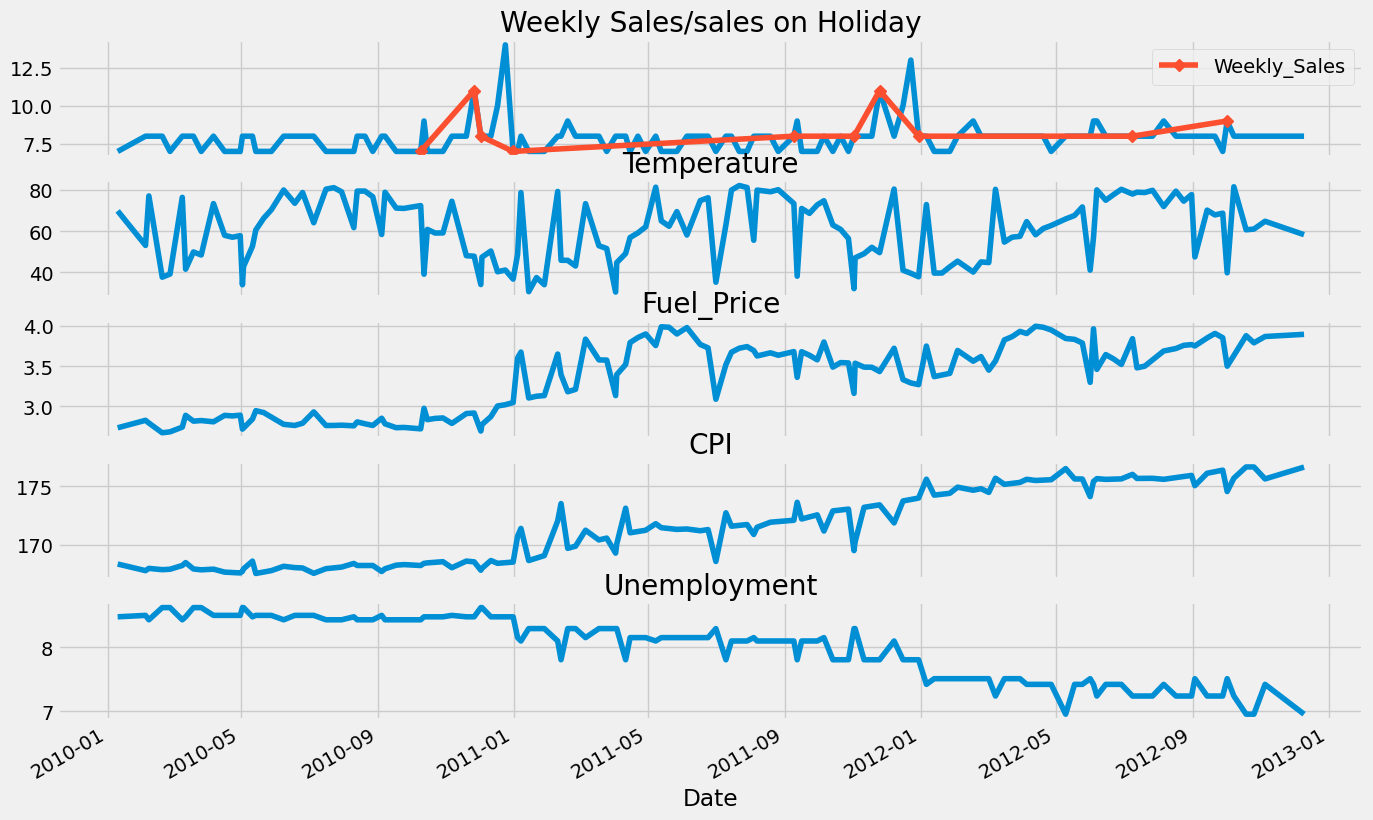

In [ ]:
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(15,4))
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True)
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")

<Axes: >

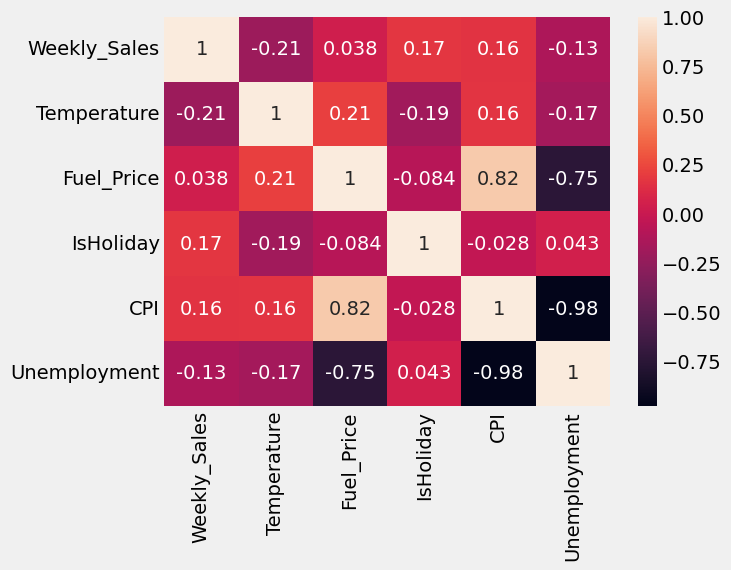

In [ ]:
sns.heatmap(data.corr(),annot=True)

Text(0, 0.5, 'Sales')

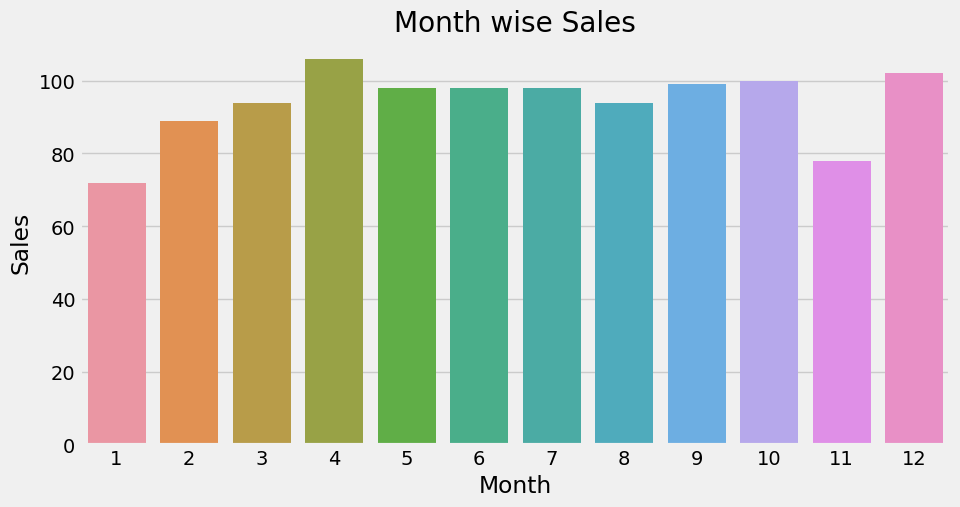

In [ ]:
data_sales_month = data.groupby(data.index.month).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(10, 5))
sns.barplot(x=data_sales_month.index,y=data_sales_month.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

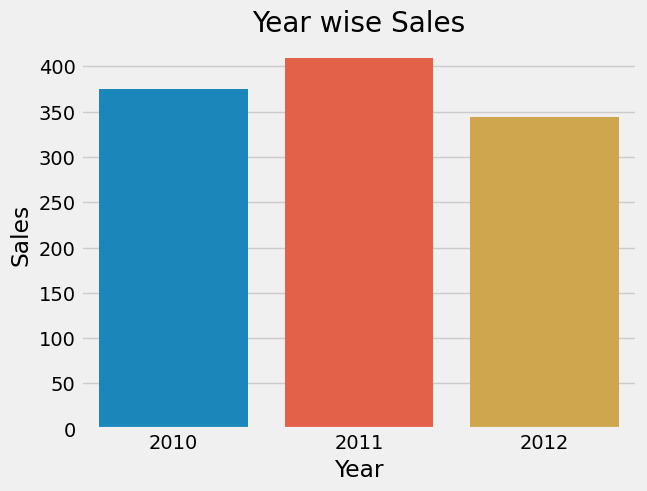

In [ ]:
data_sales_year = data.groupby(data.index.year).agg({"Weekly_Sales":"sum"})

sns.barplot(x=data_sales_year.index,y=data_sales_year.Weekly_Sales)
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Weekly_Sales"], period=45)

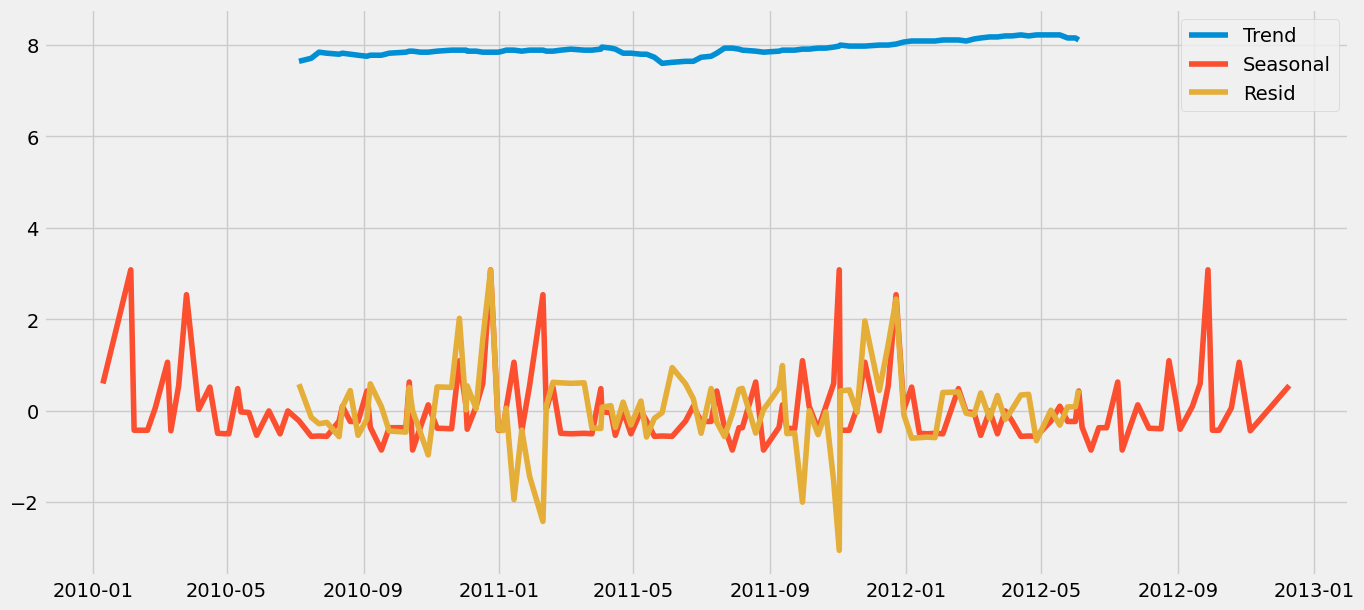

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.legend(["Trend", "Seasonal","Resid"], loc ="upper right")

In [ ]:
data_Store = df_feature.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum"})

temp_store = df_sales.groupby("Store").agg({"Weekly_Sales":"sum"})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)
data_Store.set_index(np.arange(0,45),inplace=True)
df_store["temp"] = data_Store.Temperature
df_store["Fuel_Price"] = data_Store.Fuel_Price
df_store["holiday"] = data_Store.IsHoliday
df_store["Weekly_Sales"] = temp_store.Weekly_Sales

In [ ]:
df_store.describe()

,Store,Size,temp,Fuel_Price,holiday,Weekly_Sales
count,45.000000,45.000000,45.000000,45.000000,45.0,7.000000
mean,23.000000,130287.600000,59.356198,3.405992,13.0,171.285714
std,13.133926,63825.271991,9.956122,0.153935,0.0,108.031962
min,1.000000,34875.000000,37.921264,3.245945,13.0,45.000000
25%,12.000000,70713.000000,51.866319,3.259242,13.0,67.500000
50%,23.000000,126512.000000,58.107912,3.328764,13.0,222.000000
75%,34.000000,202307.000000,68.504670,3.497874,13.0,249.000000
max,45.000000,219622.000000,75.438077,3.643654,13.0,299.000000


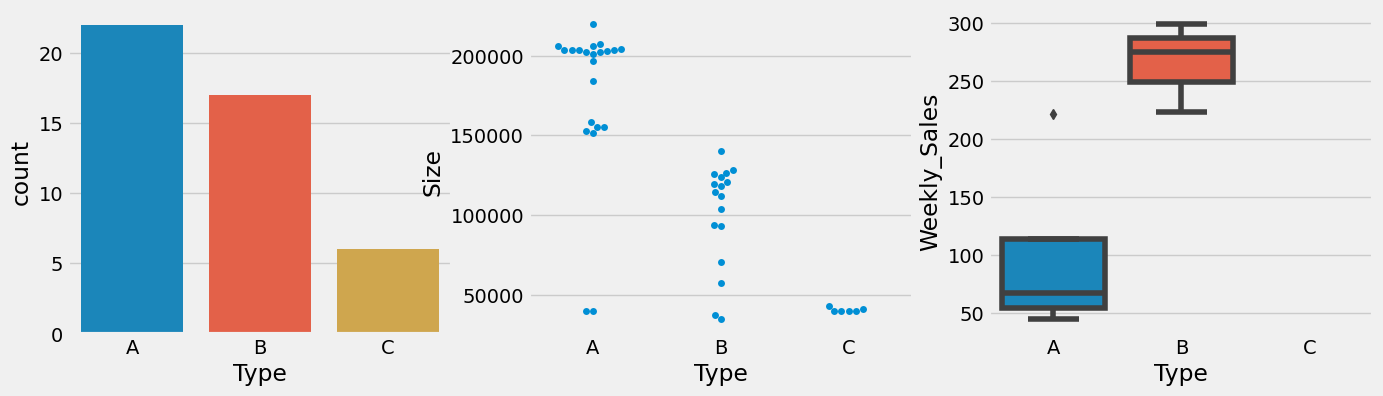

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4)) #error cleared

# Count plot of 'Type'
sns.countplot(data=df_store, x='Type', ax=ax[0])

# Swarm plot of 'Size' vs 'Type'
sns.swarmplot(data=df_store, y="Size", x="Type", ax=ax[1])

# Box plot of 'Weekly_Sales' vs 'Type'
sns.boxplot(data=df_store, y="Weekly_Sales", x="Type", ax=ax[2])

plt.show()

In [ ]:
len(df_sales["Dept"].unique())

78

In [ ]:
data_Dept = df_sales.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales")

,Weekly_Sales
Dept,
51,0
47,0
39,0
78,0
45,1
...,...
40,5010
72,5452
38,7421


Text(0.5, 0, 'Department')

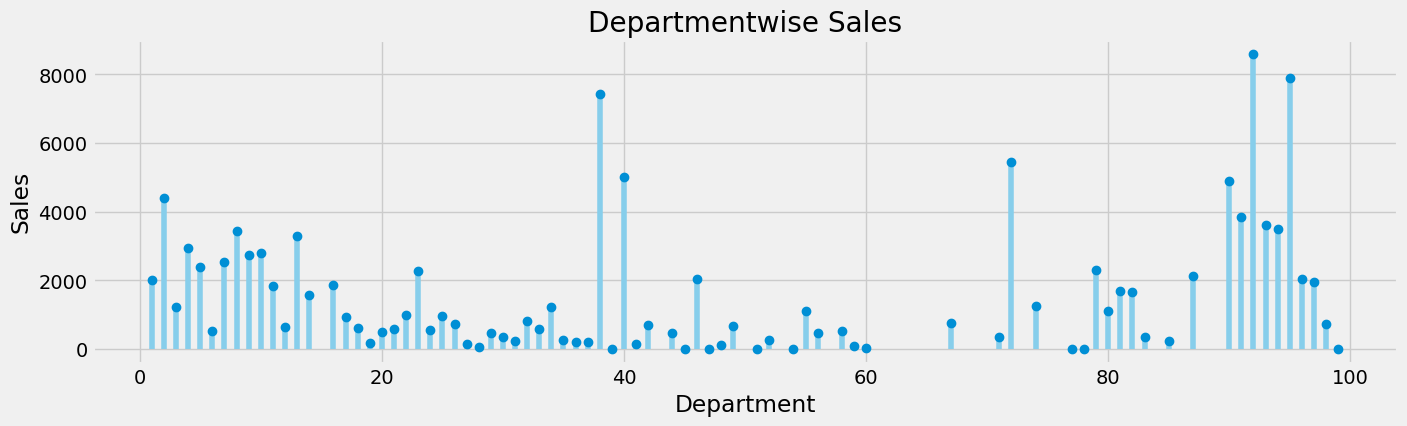

In [ ]:
fig1, ax1 = plt.subplots(figsize=(15, 4))
#ordered_df = data_Dept.sort_values(by='Weekly_Sales')
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='skyblue')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")


In [ ]:
sales_date_store = df_sales.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})
sales_date_store.sort_index(inplace=True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)
data_table = pd.merge(df_feature,sales_date_store ,  how='left', on=["Date","Store"])
data_table = pd.merge(data_table,df_store[["Store","Type"]] ,  how='left', on=["Store"])
data_table.head(20)
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

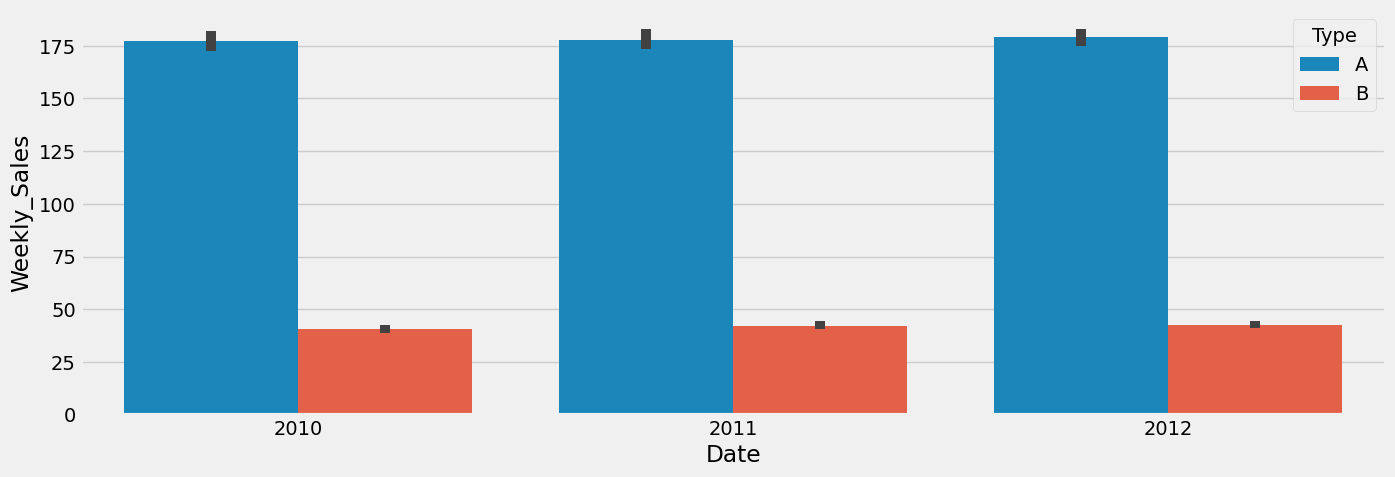

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales,hue=data_train.Type)

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

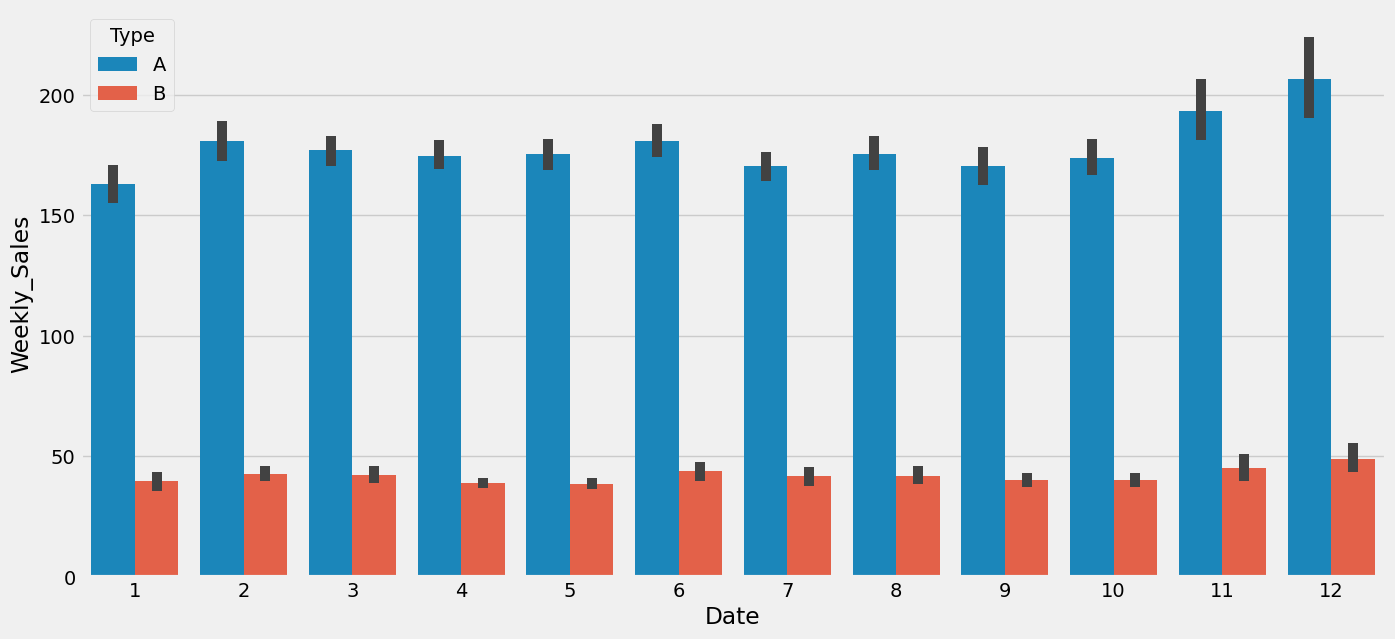

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data_train.Date.dt.month, y=data_train.Weekly_Sales,hue=data_train.Type)

Text(0.5, 0, 'Date')

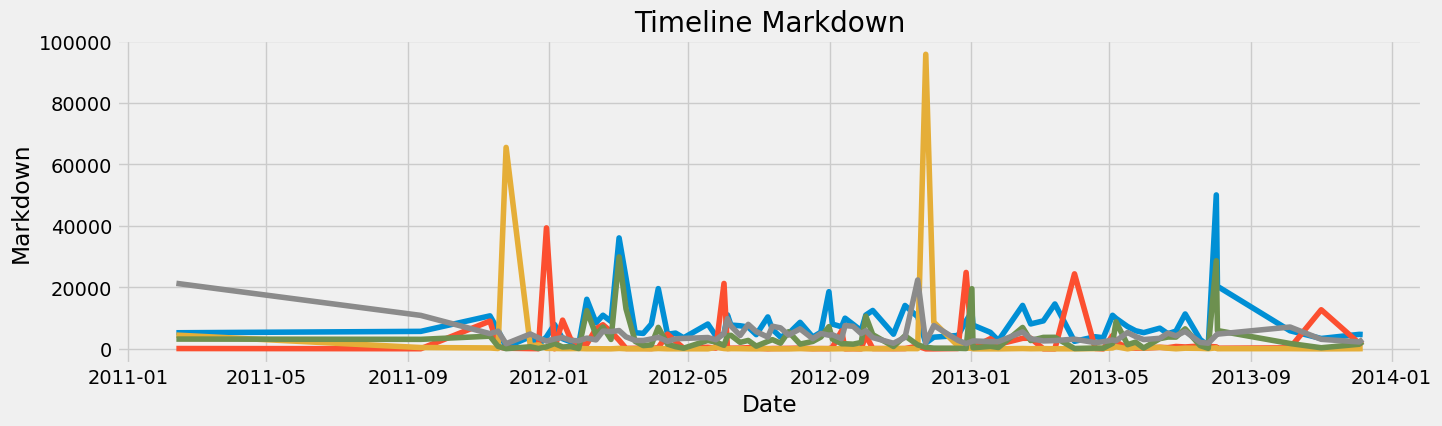

In [ ]:
plt.figure(figsize=(15,4))
train_markdown = data_table[data_table.MarkDown2.notnull()]
train_markdown = train_markdown.groupby("Date").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})


plt.plot(train_markdown.index,train_markdown.MarkDown1)
plt.plot(train_markdown.index,train_markdown.MarkDown2)
plt.plot(train_markdown.index,train_markdown.MarkDown3)
plt.plot(train_markdown.index,train_markdown.MarkDown4)
plt.plot(train_markdown.index,train_markdown.MarkDown5)
plt.title("Timeline Markdown")
plt.ylabel("Markdown")
plt.xlabel("Date")

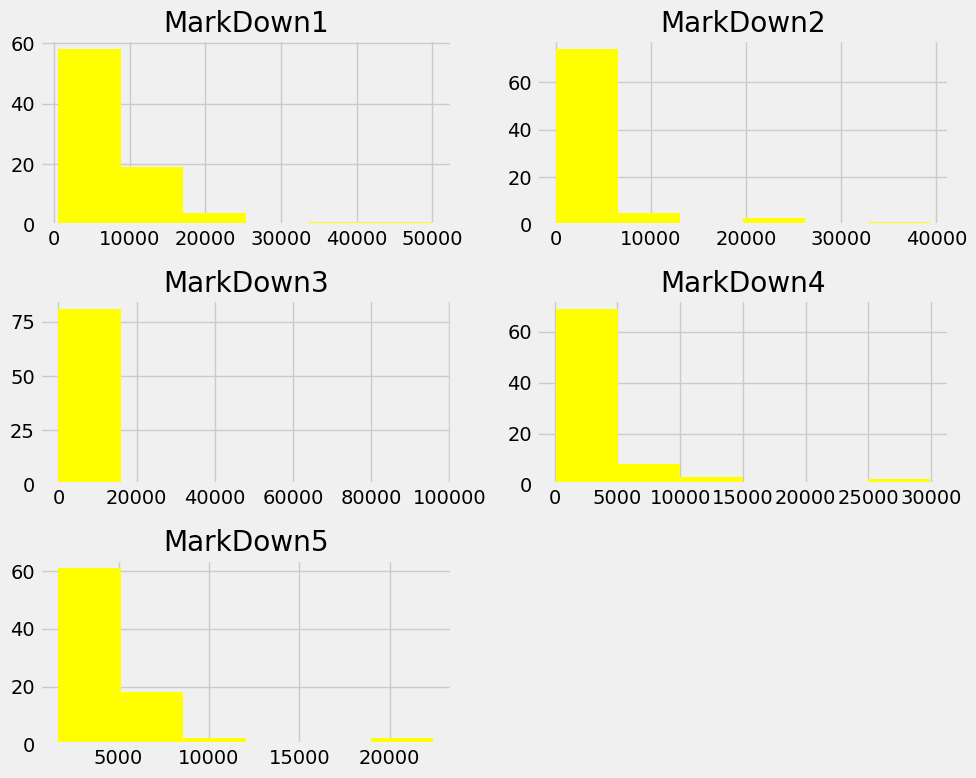

In [ ]:
train_markdown.hist(figsize=(10, 8), bins=6, color='yellow')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Markdown')

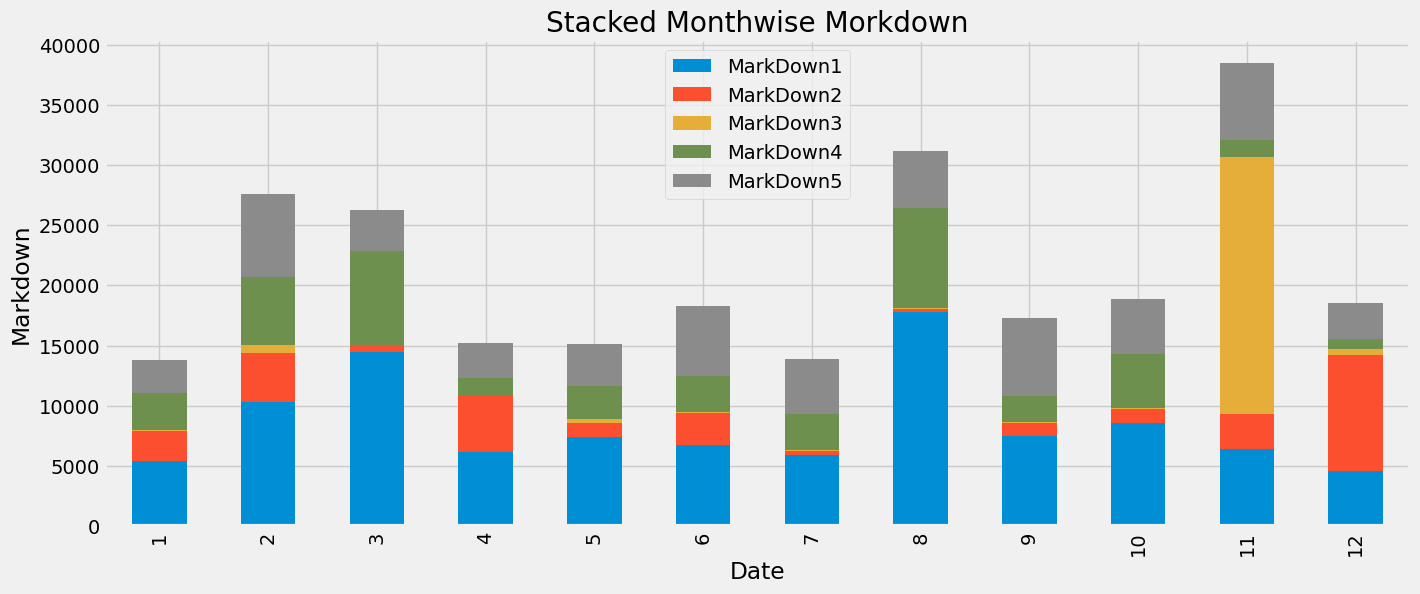

In [ ]:
train_markdown_month = train_markdown.groupby(train_markdown.index.month).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_month.plot(kind='bar', stacked=True,figsize=(15,6))
plt.title("Stacked Monthwise Morkdown")
plt.ylabel("Markdown")

Text(0, 0.5, 'Markdown')

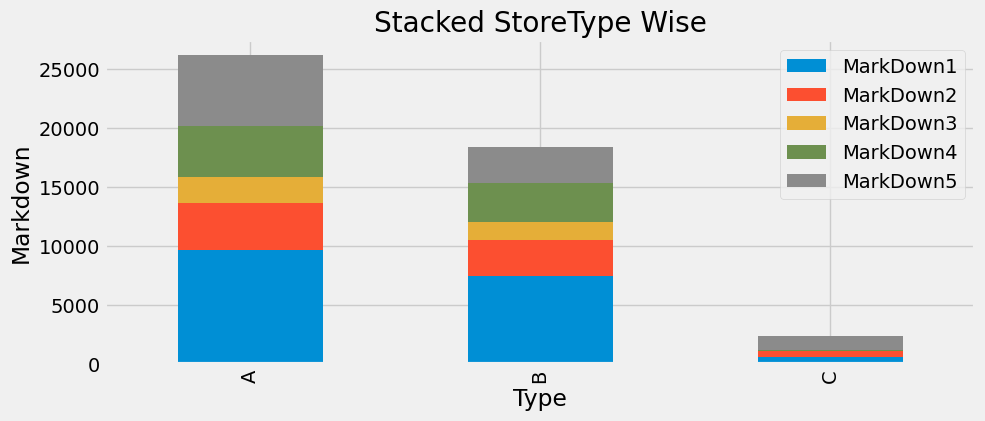

In [ ]:
train_markdown_1 = data_table[data_table.MarkDown2.notnull()]
train_markdown_type = train_markdown_1.groupby("Type").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_type.plot(kind='bar', stacked=True,figsize=(10,4))
plt.title("Stacked StoreType Wise")
plt.ylabel("Markdown")

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=4f85c346eac91b4dad23500f75c0153d33393d314cb33ac685707a3b4f2bc873
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=bfe3d7432cb7a06ffc91225f231057cbbda742cbed8a8d7032dbbc934270afc7
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import IterativeImputer
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.linear_model import ElasticNet, Lasso, RidgeCV,LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [ ]:
def createdummies(data,cols):
    for col in cols:
        one_hot = pd.get_dummies(data[col],prefix=col)
        data = data.join(one_hot)
        data.drop(col,axis = 1,inplace=True)

    return data

In [ ]:
# imputing the missing value
itt = IterativeImputer()
df = itt.fit_transform(data_table[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])
data_table.MarkDown1 = df[:,0]
data_table.MarkDown2 = df[:,1]
data_table.MarkDown3 = df[:,2]
data_table.MarkDown4 = df[:,3]
data_table.MarkDown5 = df[:,4]

data_table['CPI'].fillna((data_table['CPI'].mean()), inplace=True)
data_table['Unemployment'].fillna((data_table['Unemployment'].mean()), inplace=True)
data_table['IsHoliday'] = data_table['IsHoliday'].map({True:0,False:1})

#create new column
data_table["Month"] = data_table.Date.dt.month
data_table["Year"] = data_table.Date.dt.year
data_table["WeekofYear"] = data_table.Date.dt.weekofyear
data_table.drop(['Date'],axis=1,inplace=True)

#create dummies out of categorical column
data_table = createdummies(data_table,["Type","Month","Year","WeekofYear"])

In [ ]:
data_table.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Type_A', 'Type_B', 'Type_C', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013', 'WeekofYear_1', 'WeekofYear_2',
       'WeekofYear_3', 'WeekofYear_4', 'WeekofYear_5', 'WeekofYear_6',
       'WeekofYear_7', 'WeekofYear_8', 'WeekofYear_9', 'WeekofYear_10',
       'WeekofYear_11', 'WeekofYear_12', 'WeekofYear_13', 'WeekofYear_14',
       'WeekofYear_15', 'WeekofYear_16', 'WeekofYear_17', 'WeekofYear_18',
       'WeekofYear_19', 'WeekofYear_20', 'WeekofYear_21', 'WeekofYear_22',
       'WeekofYear_23', 'WeekofYear_24', 'WeekofYear_25', 'WeekofYear_26',
       'WeekofYear_27', 'WeekofYear_28', 'WeekofYear_29', 'WeekofYear_30',
       'WeekofYear_31', 'WeekofYear_

In [ ]:
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]
X = data_train.drop('Weekly_Sales', axis=1)
y = data_train['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
classifiers = [
    LinearRegression(),
    ElasticNet(),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5),
    Lasso(alpha =16, random_state=100),
    ElasticNet(alpha=0.8),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR(),
    LinearSVR(),
    NuSVR(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor()
    ]

name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2174
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 34
[LightGBM] [Info] Start training from score 121.012500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [ ]:
df_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score

,rmse,score,model
name,,,
KernelRidge,2356.542623,-1020.701473,"KernelRidge(alpha=0.6, coef0=2.5, kernel='poly..."
LinearSVR,110.500413,-1.246473,LinearSVR()
SVR,76.287763,-0.070738,SVR()
NuSVR,71.499362,0.059459,NuSVR()
Lasso,43.812668,0.646839,"Lasso(alpha=16, random_state=100)"
ElasticNet,38.393704,0.728798,ElasticNet()
ElasticNet,35.993714,0.761644,ElasticNet(alpha=0.8)
RidgeCV,17.682593,0.942474,"RidgeCV(alphas=[0.001, 0.01, 0.1, 1])"
LinearRegression,17.565912,0.943231,LinearRegression()


In [ ]:
model = df_score.loc["XGBRegressor","model"]
data_test.drop(['Weekly_Sales'],axis=1,inplace=True)
predict = model.predict(data_test)
predict

array([167.78734 , 171.1094  , 159.32722 , ...,  65.670265,  64.46427 ,
        57.580685], dtype=float32)